In [5]:
%cd /content/drive/MyDrive/Dicoding_Machine_Learning_2/Submission2

import pandas as pd
import numpy as np

df = pd.read_csv('weatherHistory.csv')
df.head()

/content/drive/MyDrive/Dicoding_Machine_Learning_2/Submission2


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Text(0.5, 1.0, 'Temperature')

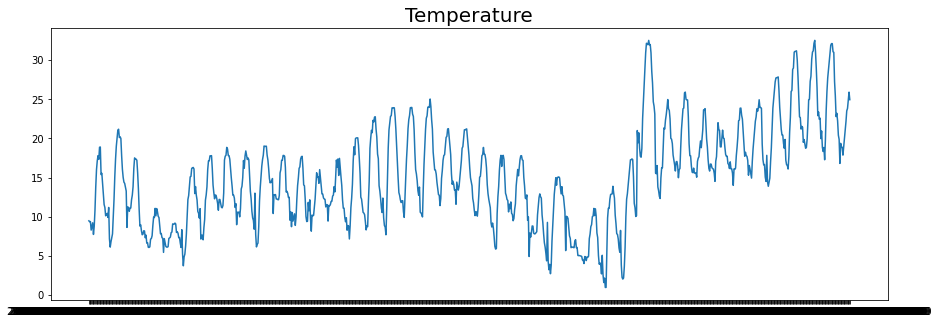

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dates = df['Formatted Date']
temp = df['Temperature (C)']

temp_train, temp_test, date_train, date_test = train_test_split(temp, dates, test_size=0.2, shuffle=False)

dates_show = dates[:1000]
temp_show = temp[:1000]

plt.figure(figsize=(15,5))
plt.plot(dates_show, temp_show)
plt.title(
    'Temperature',
    fontsize=20
    )

In [8]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [11]:
import tensorflow as tf

train_set = windowed_dataset(temp_train, window_size=60, batch_size=1024, shuffle_buffer=1000)
test_set = windowed_dataset(temp_test, window_size=60, batch_size=1024, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [12]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<1): #(RangMax-RangeMin)*0.1 = (51-21)*0.1 = 3
      print('\nMAE Tercapai')
      self.model.stop_training = True
callback = myCallbacks()

In [14]:
history = model.fit(train_set, validation_data = test_set, epochs=20, callbacks=[callback])

Epoch 1/20
76/76 [==============================] - 127s 2s/step - loss: 11.3035 - mae: 11.7916 - val_loss: 10.2025 - val_mae: 10.6874
Epoch 2/20
76/76 [==============================] - 81s 1s/step - loss: 9.0084 - mae: 9.4927 - val_loss: 7.5460 - val_mae: 8.0294
Epoch 3/20
76/76 [==============================] - 78s 1s/step - loss: 6.4886 - mae: 6.9653 - val_loss: 5.1732 - val_mae: 5.6453
Epoch 4/20
76/76 [==============================] - 79s 1s/step - loss: 4.4456 - mae: 4.9136 - val_loss: 3.4404 - val_mae: 3.9018
Epoch 5/20
76/76 [==============================] - 78s 1s/step - loss: 3.1826 - mae: 3.6402 - val_loss: 2.4013 - val_mae: 2.8454
Epoch 6/20
76/76 [==============================] - 78s 1s/step - loss: 2.2411 - mae: 2.6823 - val_loss: 1.5041 - val_mae: 1.9139
Epoch 7/20
76/76 [==============================] - 79s 1s/step - loss: 1.5279 - mae: 1.9485 - val_loss: 1.0235 - val_mae: 1.4163
Epoch 8/20
76/76 [==============================] - 77s 1s/step - loss: 1.1615 - mae:

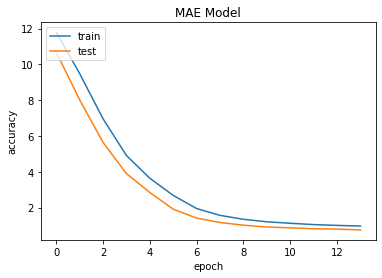

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

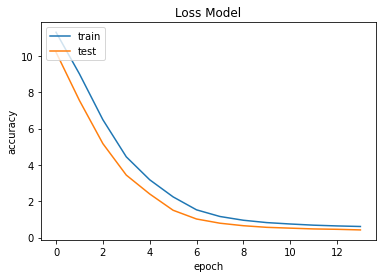

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()